Done by SREEHARI.S

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("mcdonalds.csv")

In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.info

<bound method DataFrame.info of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gen

In [5]:
print(data.describe())

               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


In [6]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [7]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [8]:
print(data.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [9]:
print(data.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [10]:
print(data.shape)

(1453, 15)


In [11]:
MD_x = (data.iloc[:, :11] == "Yes").astype(int)
print(MD_x.mean().round(2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [12]:
pca = PCA()
MD_pca = pca.fit(MD_x)

In [13]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [14]:
print("Explained Variance:", explained_variance.round(4))
print("Cumulative Proportion:", cumulative_variance.round(4))

Explained Variance: [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative Proportion: [0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [15]:
print("Standard deviations:", pca.singular_values_.round(1))

Standard deviations: [28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]


In [16]:
pd.set_option("display.float_format", "{:.3f}".format)
rotation_matrix = pd.DataFrame(pca.components_.T, index=MD_x.columns, columns=[f"PC{i+1}" for i in range(MD_x.shape[1])])
print("Rotation Matrix:")
print(rotation_matrix.round(3))

Rotation Matrix:
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0.729 -0.211 -0.027 -0.167 -0.072   

             PC10   PC11  
yummy      -0.110  0.045  
conv

In [17]:
clusters = range(2, 9)
inertia = []
kmeans_models = {}

In [18]:
print(kmeans_models.keys())

dict_keys([])


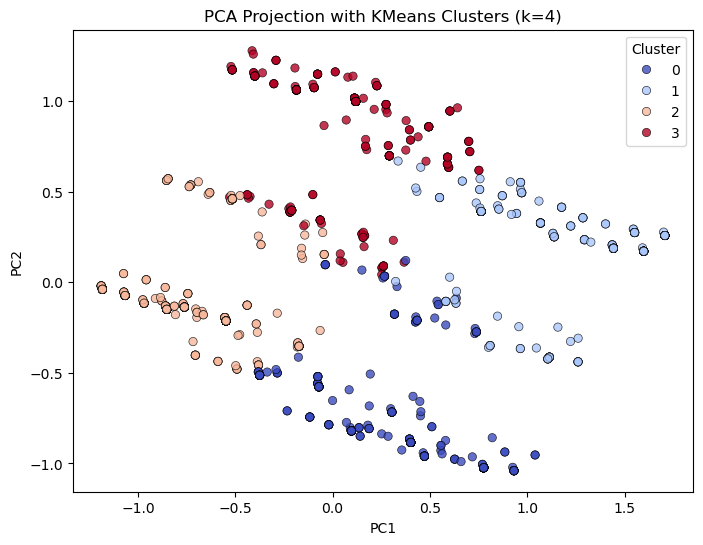

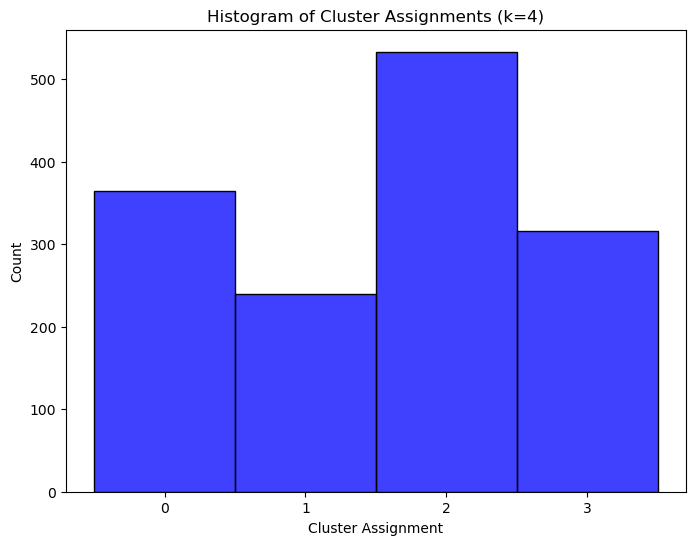

In [19]:
pca = PCA()
pca_scores = pca.fit_transform(MD_x)

# Perform k-means clustering for k = 2 to 8
clusters = range(2, 9)
kmeans_models = {}

for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
    kmeans.fit(MD_x)
    kmeans_models[k] = kmeans  # Store models


k = 4 
kmeans_labels = kmeans_models[k].labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_scores[:, 0], y=pca_scores[:, 1], hue=kmeans_labels, palette="coolwarm", alpha=0.8, edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"PCA Projection with KMeans Clusters (k={k})")
plt.legend(title="Cluster")
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(kmeans_labels, bins=np.arange(-0.5, k + 0.5, 1), kde=False, color='blue')
plt.xlabel("Cluster Assignment")
plt.ylabel("Count")
plt.title(f"Histogram of Cluster Assignments (k={k})")
plt.xticks(range(k))
plt.show()

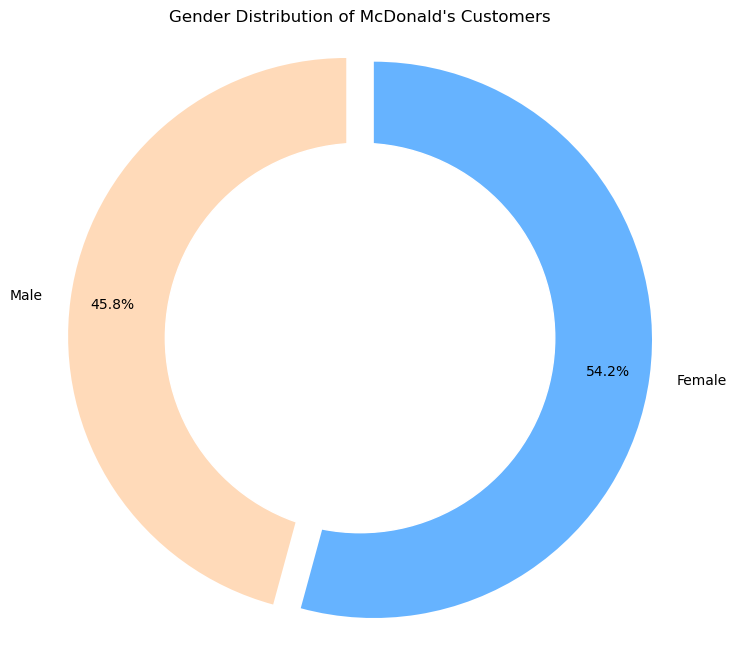

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("mcdonalds.csv")


labels = ['Male', 'Female']
sizes = [df.query('Gender == "Male"').Gender.count(), df.query('Gender == "Female"').Gender.count()]


colors = ['#ffdab9', '#66b3ff']
explode = (0.05, 0.05)  # Slight separation for both sections


plt.figure(figsize=(8, 8))
plt.pie(
    sizes, colors=colors, labels=labels, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, explode=explode
)


center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(center_circle)


plt.axis('equal')

plt.title("Gender Distribution of McDonald's Customers")
plt.show()

In [21]:
k4_labels = kmeans_models[4].labels_
display(pd.Series(k4_labels, name="Cluster Assignments (k=4)"))

0       0
1       3
2       3
3       2
4       0
       ..
1448    1
1449    2
1450    3
1451    2
1452    1
Name: Cluster Assignments (k=4), Length: 1453, dtype: int32

In [22]:
from sklearn.metrics import silhouette_score
k4_labels = kmeans_models[4].labels_
silhouette_avg = silhouette_score(MD_x, k4_labels)
print(f"Silhouette Score for k=4: {silhouette_avg:.4f}")

Silhouette Score for k=4: 0.2571


In [23]:
import os
os.environ["OMP_NUM_THREADS"] = "6"

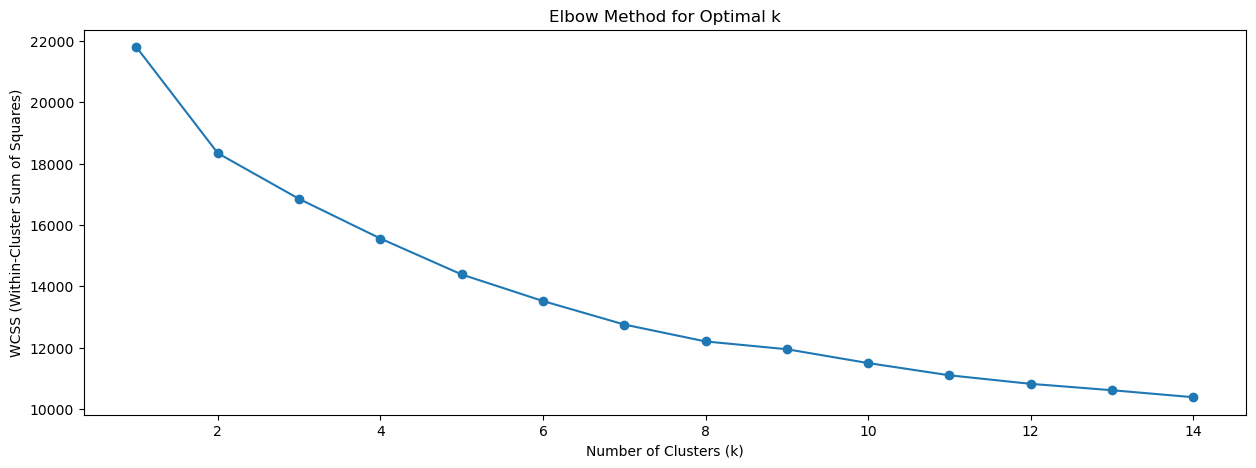

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans


df = pd.read_csv("mcdonalds.csv")

df["Like"] = pd.to_numeric(df["Like"], errors="coerce")

label_encoder = LabelEncoder()
for column in df.select_dtypes(include=["object"]).columns:
    df[column] = label_encoder.fit_transform(df[column])

imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

scaler = StandardScaler()
data_model = scaler.fit_transform(df_imputed)


wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

Missing values before handling:
 yummy               0
convenient          0
spicy               0
fattening           0
greasy              0
fast                0
cheap               0
tasty               0
expensive           0
healthy             0
disgusting          0
Like              295
Age                 0
VisitFrequency      0
Gender              0
dtype: int64


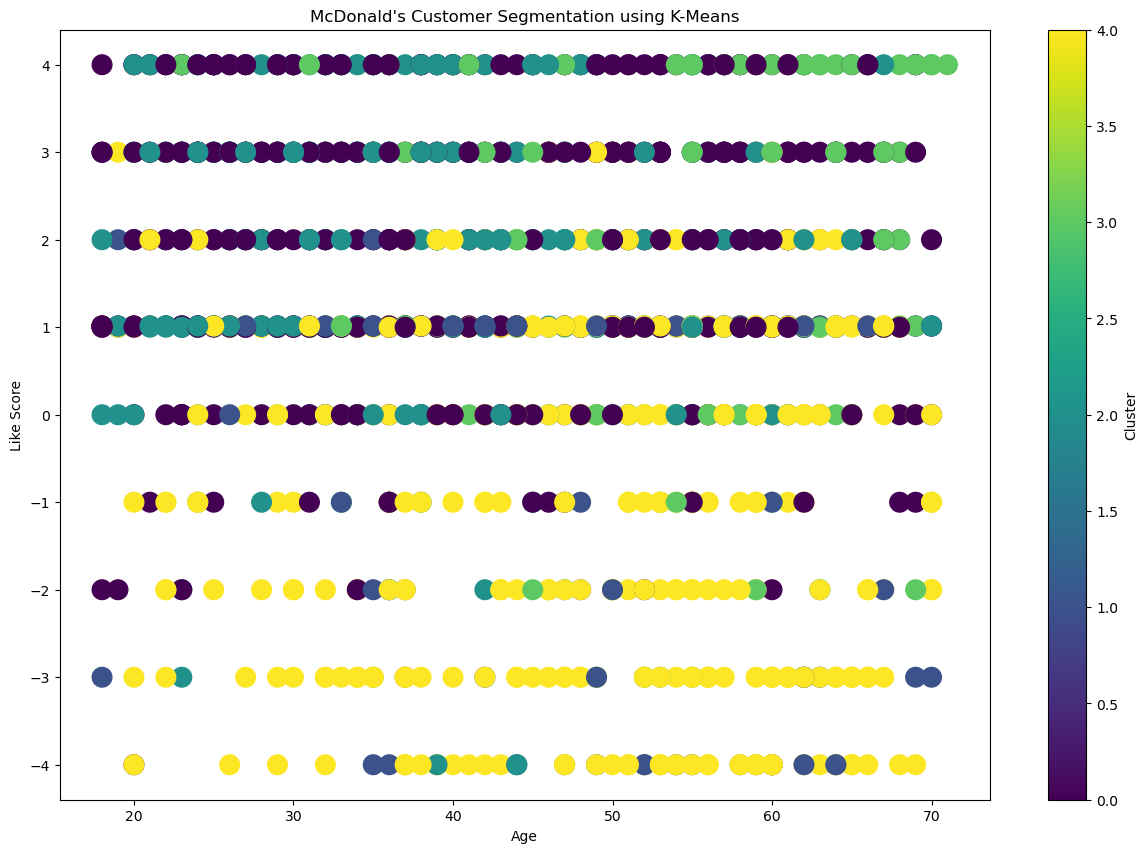

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer  # To handle NaN values


df = pd.read_csv("mcdonalds.csv")


df["Like"] = pd.to_numeric(df["Like"], errors="coerce")


label_encoder = LabelEncoder()
for column in df.select_dtypes(include=["object"]).columns:
    df[column] = label_encoder.fit_transform(df[column])

print("Missing values before handling:\n", df.isnull().sum())


imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


scaler = StandardScaler()
data_model = scaler.fit_transform(df_imputed)


kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data_predict = kmeans.fit_predict(data_model)


df_imputed["Cluster"] = data_predict


plt.figure(figsize=(15, 10))
plt.scatter(df_imputed["Age"], df_imputed["Like"], c=data_predict, s=200, cmap="viridis")
plt.xlabel("Age")
plt.ylabel("Like Score")
plt.title("McDonald's Customer Segmentation using K-Means")
plt.colorbar(label="Cluster")
plt.show()

Missing values before handling:
 yummy               0
convenient          0
spicy               0
fattening           0
greasy              0
fast                0
cheap               0
tasty               0
expensive           0
healthy             0
disgusting          0
Like              295
Age                 0
VisitFrequency      0
Gender              0
dtype: int64


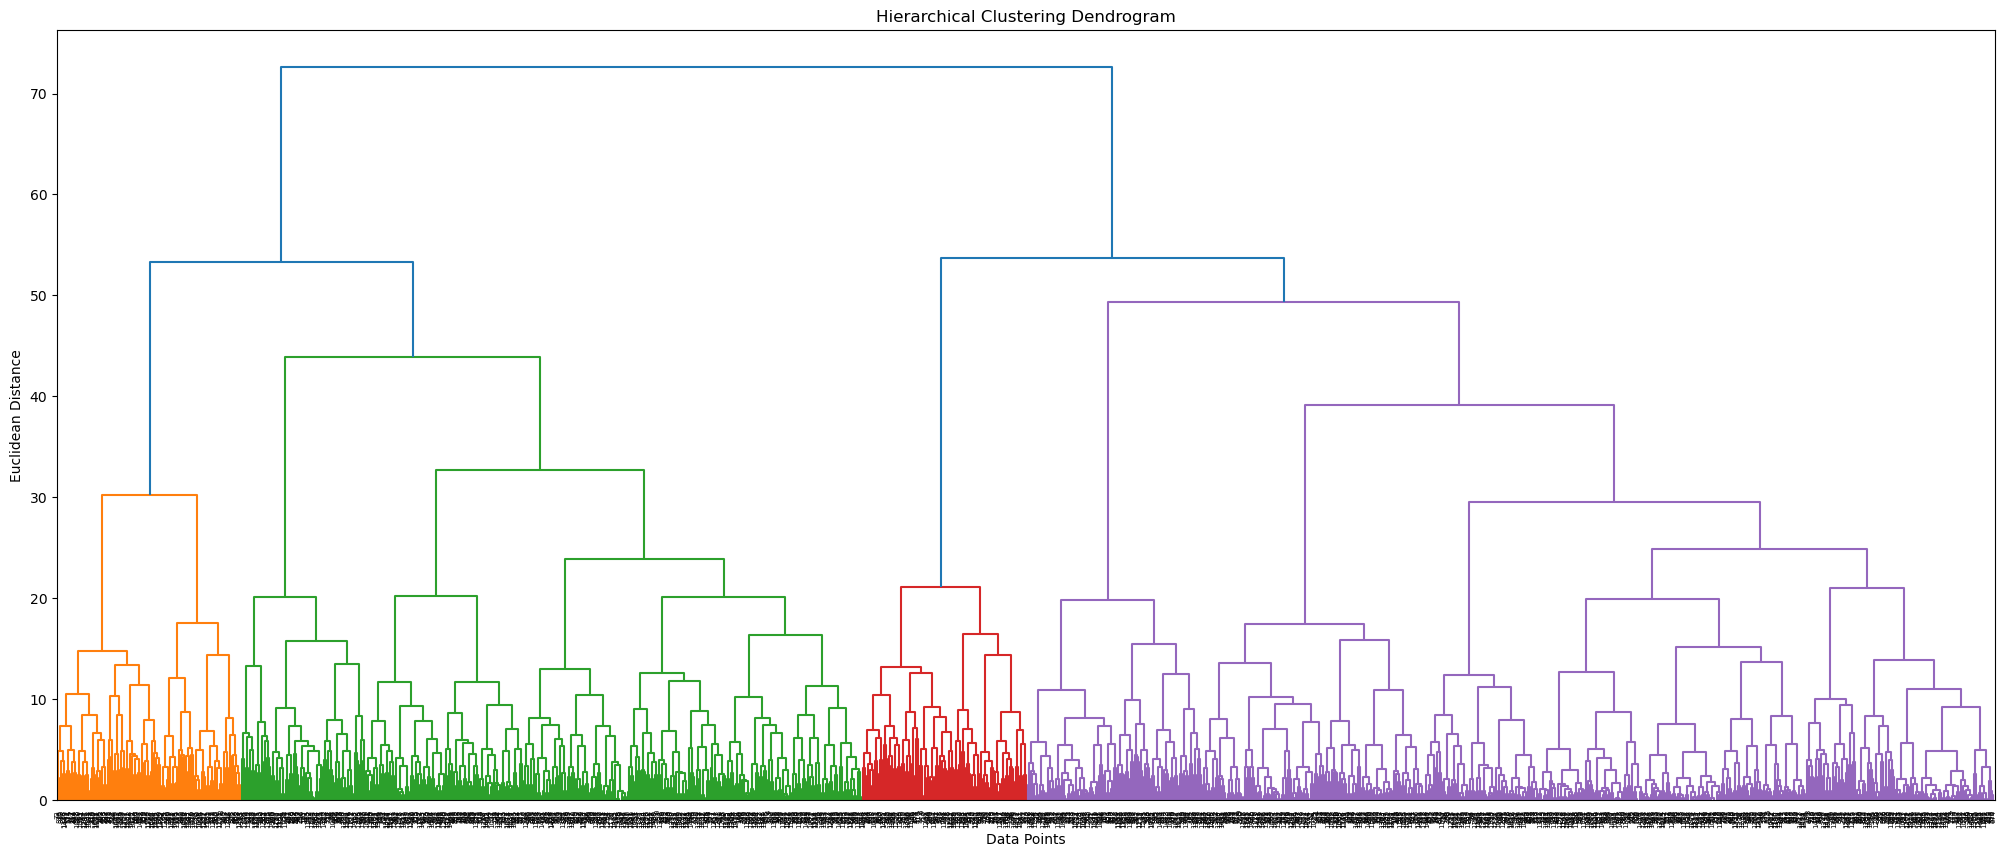

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


df = pd.read_csv("mcdonalds.csv")


df["Like"] = pd.to_numeric(df["Like"], errors="coerce")


label_encoder = LabelEncoder()
for column in df.select_dtypes(include=["object"]).columns:
    df[column] = label_encoder.fit_transform(df[column])


print("Missing values before handling:\n", df.isnull().sum())

imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


scaler = StandardScaler()
data_model = scaler.fit_transform(df_imputed)

if not np.isfinite(data_model).all():
    raise ValueError("Data contains infinite or NaN values after processing!")


merg = linkage(data_model, method="ward")


plt.figure(figsize=(25, 10))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

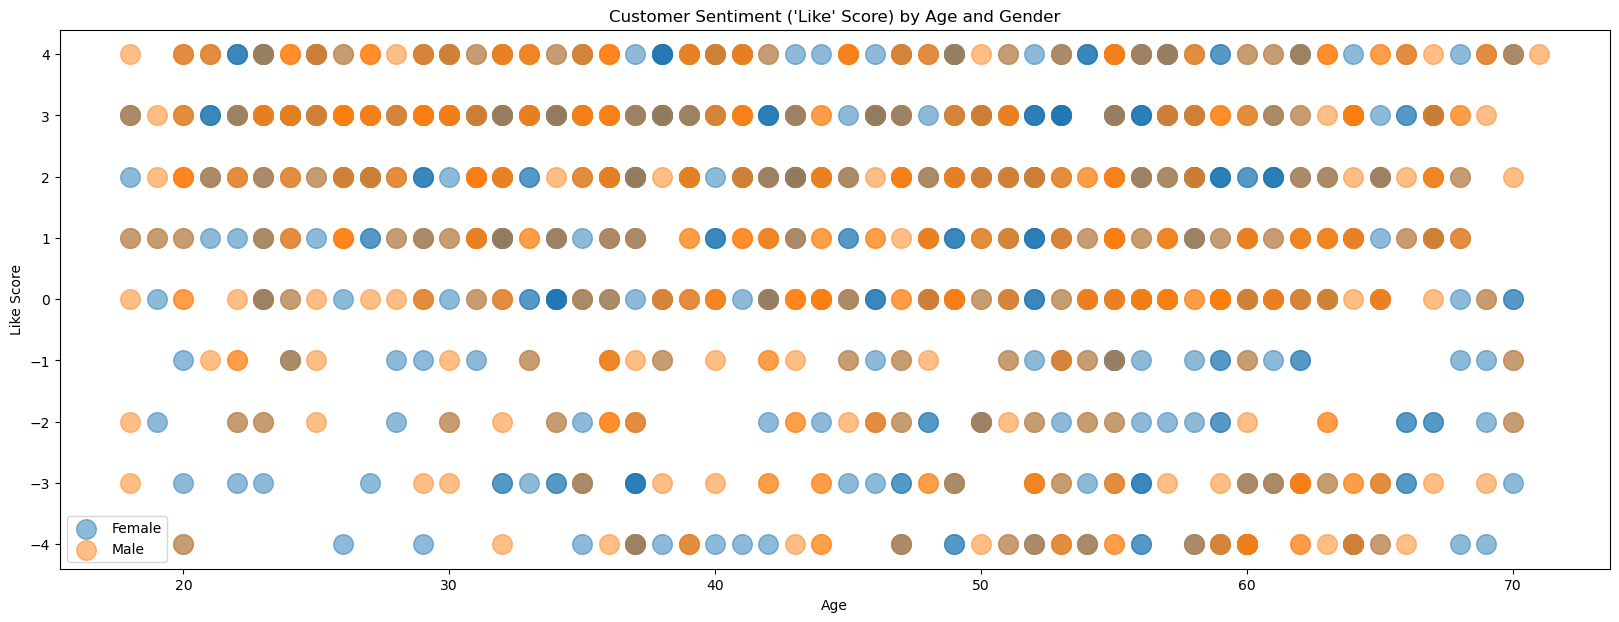

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("mcdonalds.csv")

# Convert 'Like' column to numeric for plotting
df["Like"] = pd.to_numeric(df["Like"], errors="coerce")

# Encode Gender column for filtering
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])  # 0 = Female, 1 = Male

# Map back gender labels
gender_map = {0: "Female", 1: "Male"}

plt.figure(figsize=(20, 7))

for i, gender_label in gender_map.items():
    plt.scatter(
        x=df[df["Gender"] == i]["Age"],
        y=df[df["Gender"] == i]["Like"],
        s=200,
        alpha=0.5,
        label=gender_label
    )

plt.legend()
plt.xlabel("Age")
plt.ylabel("Like Score")
plt.title("Customer Sentiment ('Like' Score) by Age and Gender")
plt.show()